<a href="https://colab.research.google.com/github/YuriiKlim/AI/blob/Lesson5/Copy_of_%D0%94%D0%97_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів та даних

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/ship_passengers.csv",
                 index_col="Unnamed: 0")

Дані про пасажирів корабля:

pclass -- клас білета(перший, другий або третій)

sex -- стать

age -- вік

sibsp -- кількість братів\сестер та чоловіків\дружин на борту

parch -- кількість дітей та батьків на борту

fare -- вартість поїздки

embarked -- Порт посадки (C = Шербур, Q = Квінстаун, S = Саутгемптон)

In [3]:
df

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


# Завдання
Проведіть аналіз даних пасажирів. Включіть

* аналіз числових ознак
* аналіз категоріальних ознак
* перевірку викидів

В результаті як коментар опишіть дані(що на що впливає\не впливає і як, можливо якихось даних надто мало і потрібно більше даних, тощо)

In [4]:
numeric_summary = df.describe()
numeric_summary

,pclass,age,sibsp,parch,fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


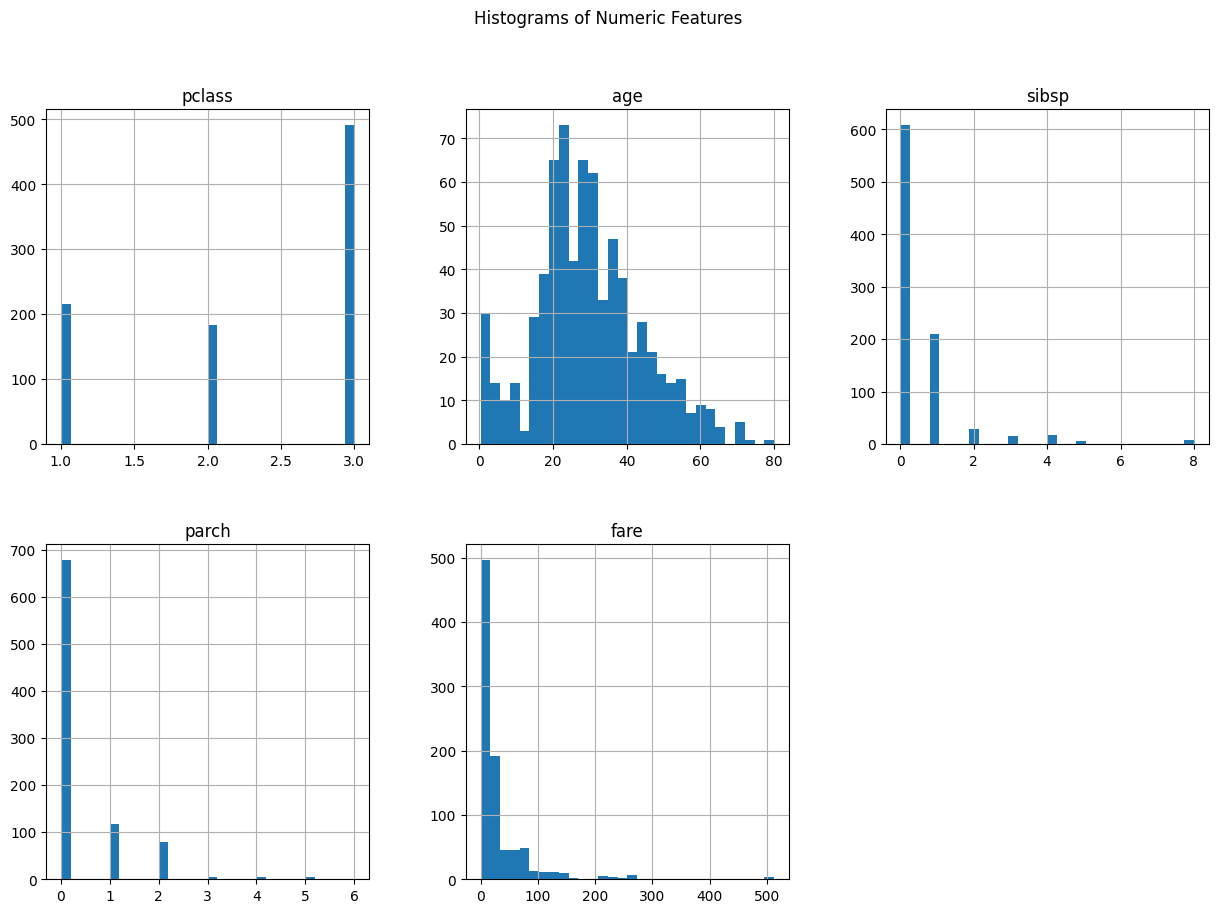

In [5]:
numeric_columns = df.select_dtypes(include='number').columns
df[numeric_columns].hist(bins=30, figsize=(15, 10), layout=(2, 3))
plt.suptitle('Histograms of Numeric Features')
plt.show()

Аналіз числових значень показав, що розподіли деяких ознак мають значний розкид значень.

У колонці fare(вартість проїзду) значна кількість значень - 0 що не може бути правдою, видалення викидів пизведе у залишку до нереалістичних даних, краще не враховувати цю колонку.

Також відслідковується значний дизбаланс у колонках parch(кількість дітей та батьків на борту) та sibsp(кількість братів\сестер та чоловіків\дружин на борту) хоч ці данні досить реалістичні та можуть послугувати для таблиці кореляцій, наприклад з віком та класом білата.

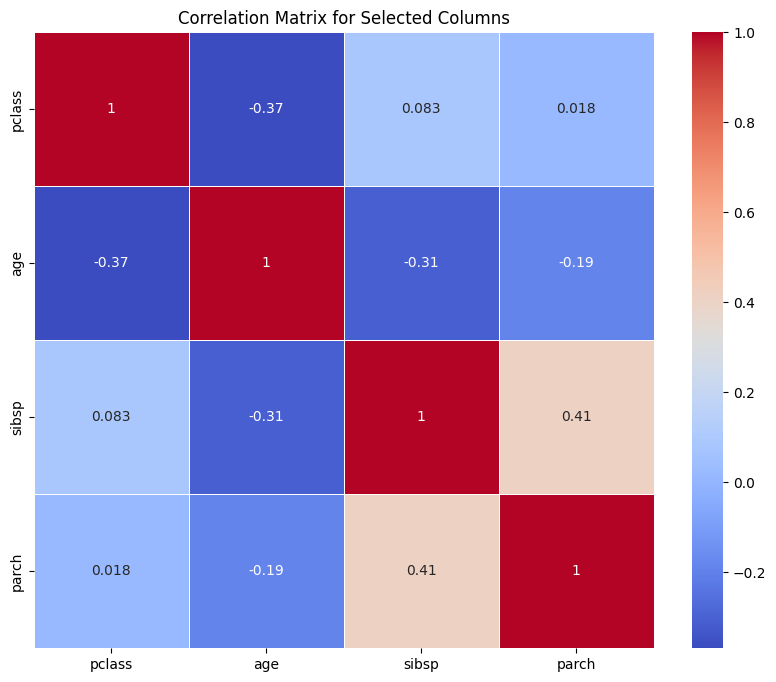

In [12]:
selected_columns = ['pclass', 'age', 'sibsp', 'parch']

correlation_matrix = df[selected_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Selected Columns')
plt.show()

Хоч кореляція недостатня для висновків, та можна сказати що кількість дітей та батьків на борту та кількість братів\сестер та чоловіків\дружин на борту корелюють мож собою з чого можемо зробити припущення(обережно), що пасажири беручи на борт родича можуть взяти усю найближчу сім'ю.

Але потрібно більше даних.

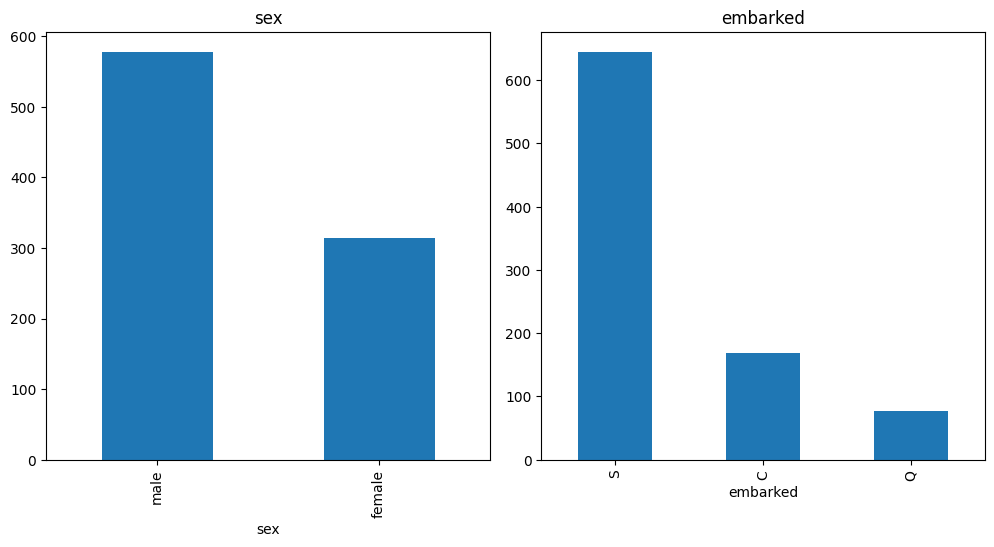

In [6]:
categorical_summary = df.select_dtypes(include='object').describe()
categorical_summary

plt.figure(figsize=(15, 10))
for i, column in enumerate(df.select_dtypes(include=['object']).columns, 1):
    plt.subplot(2, 3, i)
    df[column].value_counts().plot(kind='bar')
    plt.title(column)
plt.tight_layout()
plt.show()

З аналізу категоріальних ознак можемо зробити прості висновки: що корабельна переправа більш популярна у чоловіків та найбільш популярний порт посадки - Саутгемптон

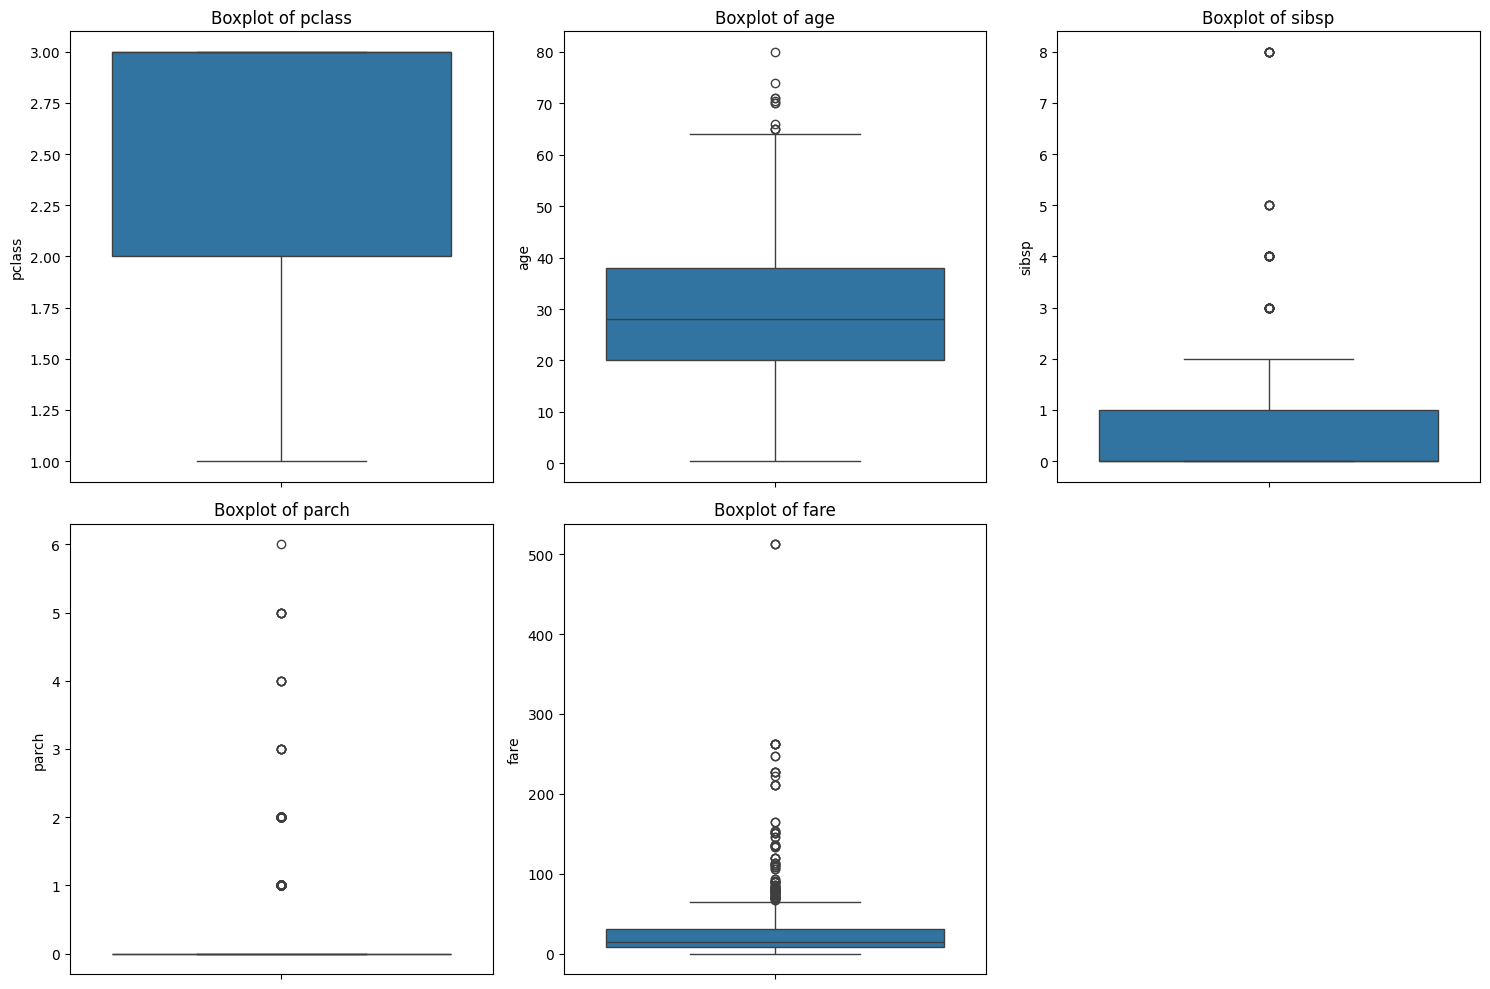

In [7]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=column, data=df)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [10]:
def find_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

outliers = {column: find_outliers(df, column) for column in numeric_columns}

outlier_counts = {column: len(outliers[column]) for column in numeric_columns}

outlier_counts

{'pclass': 0, 'age': 11, 'sibsp': 46, 'parch': 213, 'fare': 116}

Для подальшого аналізу може знадобитися збір додаткових даних оскільки обробка викидів може призвести до залишку недостатньої їх кількості.

Також потрібно ретельніше стивитись до заповнення даних про ціну проїзду.